# Twitterの自動化のもろもろを合わせたノートブック

### 共通して実行する部分

In [1]:
import config # 認証情報の読み込み
import tweepy
import time
import pandas as pd
from tqdm import tqdm

In [2]:
# TwitterAPIの認証データを取得して認証
CK = config.CONSUMER_KEY
CS = config.CONSUMER_SECRET
AT = config.ACCESS_TOKEN
ATS = config.ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CK, CS)
auth.set_access_token(AT, ATS)
api = tweepy.API(auth)

## ツイート編

In [3]:
try:
    api.update_status("スパイダーマンがMCUに参戦して渋々見始めたMCUだけど、\nハマりすぎてたぶんこれ全部見終わるまで行くわ。")
    print("トゥイ―トしました(*‘ω‘ *)")
except:
    print("失敗(/ω＼)")

トゥイ―トしました(*‘ω‘ *)


# タイムライン表示

## 単語検索からのファボ・RT編

In [3]:
# 変数の初期化
fav_count = 0
loop_out = False
roop_n = 2  # ループ回数
query = "わたモテ" # ループ回数

In [4]:
for loop_count in range(roop_n): #ループカウント指定
    print("----------------------------------")
    print(str(loop_count + 1) + "回目のループ開始！")
    print("----------------------------------")
    # Max100人までしか検索できないぽい。また、単語検索結果で検索結果出てきたアカウント数が上限となる。
    search_count = 30
    results = api.search(q=query, count=search_count)
    for result in results:
        #  いいねした人数が特定人数以上になったらループ抜けて処理終了。
        if fav_count > 90:
            loop_out = True
            break
        user_id = result.user.id
        user_name = result.user.name
        tweet = result.text
        tweet_id = result.id

        print("ユーザー名：" + user_name)
        print("ユーザーID：" + str(user_id))
        print("-----------------------------")

        try:
            #api.retweet(tweet_id) # RTする
            api.create_favorite(tweet_id)  # ファボする
            print(tweet)
            print("-----------------------------")
            print("をファボしました( ੭˙꒳ ˙)੭n\n")
            print("-----------------------------")
            fav_count += 1
            time.sleep(10)
        except:
            print(tweet)
            print("-----------------------------")
            print("はファボしてます('ω')\n\n")
            print("-----------------------------")
            time.sleep(3)

    print("----------------------------------")
    print(str(loop_count + 1) + "回目のループが終了しました")
    print("----------------------------------")
    # ファボ上限になったらループ抜ける
    if loop_out:
        break
    # アクセス連続しすぎるとやばいかもだから5分待つ（5分待つことで、153APIアクセス/5分 = 459APIアクセス/15分でAPIアクセス上限に引っかからないはず。）
    print("5分待ちます")
    time.sleep(300)

----------------------------------
1回目のループ開始！
----------------------------------
ユーザー名：しゅう
ユーザーID：2427755659
-----------------------------
RT @SThiUre: セイウンスカイ描いた　#ウマ娘 　#ウマ娘プリティーダービー 　＃イラスト https://t.co/VsGGv7UGXq
-----------------------------
をファボしました( ੭˙꒳ ˙)੭n

-----------------------------
ユーザー名：チャヌピ
ユーザーID：1287525995168161792
-----------------------------
RT @mei_20200620: 去年の人魚だけどタグ参加させてくださいね🐠今年の人魚も準備中です🐟️✨カラーインクです🍀
#人魚博覧会  #イラスト
#絵描きさんと繋がりたい 
#創作の狼煙  #アナログイラスト https://t.co/q3tf0C6FaS
-----------------------------
をファボしました( ੭˙꒳ ˙)੭n

-----------------------------
ユーザー名：Franco
ユーザーID：1107438026765058048
-----------------------------
RT @omochi_DB: レジェンズに新たに実装されたので過去絵ではありますが……
『僕に、地球を守れと言っていたっ!!!』
#ドラゴンボールレジェンズ3周年 
#イラスト https://t.co/l0YAMdX21e
-----------------------------
をファボしました( ੭˙꒳ ˙)੭n

-----------------------------
ユーザー名：Łc✩たかちゃん(✌︎˙˘˙✌︎)🐟🕊
ユーザーID：217071661
-----------------------------
RT @AJITO510: いつもの写真にはって遊べるオリジナル称号。リクエストの募集です。ご本人様の印象に沿って制作させて頂きます🌈

【応募方法】
期限:6/27 12時迄。

## リスト関連

### リストの確認

In [12]:
screen_name="haida_ito" #リスト作成者の@~~の~~の部分
for twilist in api.lists_all(screen_name=screen_name):
    print("slug="+twilist.slug)
    print("name="+twilist.name)

slug=vtuber-20674
name=Vtuber
slug=glance-14476
name=glance
slug=watch-12568
name=watch
slug=surveillance-69648
name=surveillance
slug=list2
name=わたモテ
slug=thanx-14792
name=thanx
slug=echichichi-16625
name=echichichi
slug=list-18146
name=神絵師
slug=familiar-98437
name=familiar


### リスト作成

In [ ]:
api.create_list(name="わたモテ",mode="public",description="わたモテと呟いたことのある人を自動（半手動）で追加するよ")
print("リスト追加したっすよ")

### 検索してリストに追加

In [8]:
# 検索設定
query = "わたモテ"
search_count = 2


In [11]:
search_results = api.search(q=query, count=search_count)

for result in search_results:
    userid = result.user.id
    username = result.user.name
    tweet = result.text
    tweetid = result.id
    print("--------------------------------------------------")
    print("名前:"+username)
    print("ツイート:")
    print(tweet)
    print("--------------------------------------------------")
    try:
        api.create_favorite(tweetid)
        print("上のツイートをふぁぼりましたよ、ご主人様。")
        api.add_list_member(user_id=userid, slug="list2", owner_screen_name="nahamot") #listにそのツイートのユーザ名を追加する
        print(username+"をわたモテリストに追加させていただきました。")
        api.create_friendship(userid)
        print(username+"をフォローしました。")
    except:
        print(username+"ファボ、リスト追加、フォローのいずれかに異常があるかもしれません、ご主人様ァ！？")
    
try:
    api.update_status("わたモテリスト更新したっすよby python助手君")
    print("わたモテリスト更新したっすよby python助手君")
except:
    print("ツイート失敗っす(/ω＼)")

--------------------------------------------------
名前:むのす＠垢移動しました
ツイート:
[定期] 今季は、神のみ、わたモテ、きんモザ、恋愛ラボ、進撃、超電磁砲を観てます！
--------------------------------------------------
むのす＠垢移動しましたファボ、リスト追加、フォローのいずれかに異常があるかもしれません、ご主人様ァ！？
--------------------------------------------------
名前:ニア＠かぜっぴき
ツイート:
アニメはダンガンロンパ、銀の匙、わたモテあたり見てます。
--------------------------------------------------
ニア＠かぜっぴきファボ、リスト追加、フォローのいずれかに異常があるかもしれません、ご主人様ァ！？
トゥイ―トしました(*‘ω‘ *)


## 自分のタイムラインを辿って検索ワードが含まれていたらリストに追加する

In [ ]:
query = "わたモテ" #検索ワード兼リストタイトル
slug = "list2"
my_screen_name = "haida_ito"

In [ ]:
for status in api.home_timeline(count=100): #自分のタイムラインのステータス取得（個別対応）
    userid = status.user.id #ツイートのユーザーid
    username = status.user.name #ツイートのユーザ名
    tweet = status.text #ツイートの内容
    print("--------------------------")
    print("名前:"+username)
    print(tweet)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

    if query in tweet or query in username: #検索ワードかがツイートかユーザー名に含まれていた場合
        api.add_list_member(user_id=userid, slug=slug, owner_screen_name=my_screen_name) #listにそのツイートのユーザ名を追加する
        print(query+"リストに"+username+"を追加しました！")
        print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    else:
        print(query+"リストに"+username+"を追加しませんでした。")
        print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

## フォロワー情報の取得

In [4]:
my_user_id = "mochi_kyo" #ここに自分のuseridを入れる


In [5]:
follower_ids = api.followers_ids(my_user_id) #自分のアカウントのフォロワーをすべて取得する

follower_list = []
for follower_id in follower_ids:
    follower_list.append(follower_id)

print("あなたのフォロワーは" + str(len(follower_list)) + "人です。")

あなたのフォロワーは2142人です。


In [17]:
df = pd.DataFrame()

for follower in tqdm(follower_list):
    user =  api.get_user(follower)
    user_id         = user.screen_name     #ユーザー名
    description     = user.description     #プロフィール文
    tweet_count     = user.statuses_count  #ツイート数
    follower_count  = user.followers_count #フォロワー数
    following_count = user.friends_count   #フォロー数
    created_at      = user.created_at      #アカウント作成日
    protected       = user.protected       #鍵付きかどうか

    data = pd.Series([user_id,
                      description,
                      tweet_count,
                      follower_count,
                      following_count,
                      created_at,
                      protected])
    df = df.append(data, ignore_index=True)
    time.sleep(.26) #15分間で900ユーザー分のデータしか取得できないので、簡易的にスリープして対応

df.columns = ['user_id',
              'description',
              'tweet_count',
              'follower_count',
              'following_count',
              'created_at',
              'protected']

ー部df.head()

 41%|████▏     | 900/2179 [08:40<12:20,  1.73it/s]


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

## フォロバしてない人をリムーブ

In [6]:
user_id = "mochi_kyo" #ここに自分のuseridを入れる
followers_id = api.followers_ids(user_id) #自分のアカウントのフォロワーをすべて取得する
following_id = api.friends_ids(user_id) #自分のアカウントのフォローをすべて取得する

# 変数初期化
time_count = 0
end_count = 0

In [7]:
for following in following_id: #自分がフォローしているユーザーだけ取得する
    if following not in followers_id: #自分のフォローしているユーザーで、フォロワーに属さないユーザーを取得する　
        user_follower_count = api.get_user(following).followers_count
        user_following_count = api.get_user(following).friends_count
        username = api.get_user(following).name
        if end_count > 100:
            print("100人リムーブしたので終了します。")
            break
        if time_count > 20:
            print("20カウントしたので5分待ちます")
            time.sleep(300)
            time_count = 0
        if user_following_count == 0:
            print("-------------------------------------")
            print("リムーブするユーザー名は",username,"です。")
            print("フォロー数は",user_following_count,"フォロワー数は",user_follower_count,"です。")
            print("-------------------------------------")
            api.destroy_friendship(following)
            time_count += 1
            end_count += 1
            time.sleep(6)
        if user_follower_count < 20*user_following_count:
            print("-------------------------------------")
            print("リムーブするユーザー名は",username,"です。")
            print("フォロー数は",user_following_count,"フォロワー数は",user_follower_count,"です。")
            print("-------------------------------------")
            api.destroy_friendship(following)
            time_count += 1
            end_count += 1
            time.sleep(3)
        else:
            print(username,"はリムーブしません")
            time_count += 1
            time.sleep(2)

周防パトラ🦀❤️ハニスト はリムーブしません
兎田ぺこら👯‍♀️ホロライブ3期生 はリムーブしません
いちじく はリムーブしません
ぽぇぇー↑ はリムーブしません
三秋 縋 はリムーブしません
-------------------------------------
リムーブするユーザー名は The Musical Ghost (BOFXVII | TEAM パンデサル) です。
フォロー数は 272 フォロワー数は 3356 です。
-------------------------------------
叶@にじさんじ はリムーブしません
-------------------------------------
リムーブするユーザー名は サリチル酸⌨️自キ温泉ガイド です。
フォロー数は 331 フォロワー数は 2984 です。
-------------------------------------
-------------------------------------
リムーブするユーザー名は kawano2009 です。
フォロー数は 4805 フォロワー数は 5177 です。
-------------------------------------
Takanashi Kiara🐔holoEN @1 YEAR ANNIVERSARY はリムーブしません
Mori Calliope💀holoEN はリムーブしません
Gawr Gura🔱holoEN はリムーブしません
Ninomae Ina’nis🐙holoEN はリムーブしません
Watson Amelia🔎holoEN はリムーブしません
甲斐田 晴 🌞「チルレコ」上げた はリムーブしません
-------------------------------------
リムーブするユーザー名は 海色 です。
フォロー数は 14 フォロワー数は 14 です。
-------------------------------------
町田ちま🐹 はリムーブしません
語部紡 はリムーブしません
エリー・コニファー🌲25日16:00-セカフェス出場！頸椎ヘルニア妖精🧚‍♀️リハビリ中 はリムーブしません
小野町春香♨にじさんじ🌈🕒 はリムーブしません
赤坂アカ はリムーブしません
20カウントし

KeyboardInterrupt: 

## FF比によってリムーブするかを決める

In [ ]:
user_id = "haida_ito" #ここに自分のuseridを入れる

In [ ]:
followers_id = api.followers_ids(user_id) #自分のアカウントのフォロワーをすべて取得する
following_id = api.friends_ids(user_id) #自分のアカウントのフォローをすべて取得する


In [ ]:
for following in following_id: #自分がフォローしているユーザーだけ取得する
    if following not in followers_id: #自分のフォローしているユーザーで、フォロワーに属さなユーザーを取得する　
        user_follower_count = api.get_user(following).followers_count
        user_following_count = api.get_user(following).friends_count
        if user_follower_count/user_following_count < 30:
            username = api.get_user(following).name
            print("-------------------------------------")
            print("リムーブするユーザー名は",username,"です。")
            print("フォロー数は",user_following_count,"フォロワー数は",user_follower_count,"です。")
            print("-------------------------------------")
            api.destroy_friendship(following)
        else:
            print("-------------------------------------")
            print(username,"はリムーブしません。多分作家枠です。")
            print("フォロー数は",user_following_count,"フォロワー数は",user_follower_count,"です。")
            print("-------------------------------------")

# タイムライン表示

In [ ]:
#coding:utf-8
from requests_oauthlib import OAuth1Session
import json, config
# Accesss Token Secert

CK = config.CONSUMER_KEY
CS = config.CONSUMER_SECRET
AT = config.ACCESS_TOKEN
ATS = config.ACCESS_TOKEN_SECRET
twitter = OAuth1Session(CK, CS, AT, ATS) #認証処理

url = "https://api.twitter.com/1.1/statuses/user_timeline.json" #タイムライン取得エンドポイント

params ={'count' : 10} #取得数
res = twitter.get(url, params = params)

if res.status_code == 20: #正常通信出来た場合
    timelines = json.loads(res.text) #レスポンスからタイムラインリストを取得
    for line in timelines: #タイムラインリストをループ処理
        #json形式のファイルから値を取得（※）
        print(line['user']['name']+'::'+line['text'])
        print(line['created_at'])
        print('*******************************************')
else: #正常通信出来なかった場合
    print("Failed: %d" % res.status_code)

## MeCabテスト

In [1]:
import MeCab

In [2]:
mecab = MeCab.Tagger("-Ochasen")
print(mecab.parse("MeCabを用いて文章を分割してみます。"))

MeCab	メカブ	MeCab	名詞-固有名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
用い	モチイ	用いる	動詞-自立	一段	連用形
て	テ	て	助詞-接続助詞		
文章	ブンショウ	文章	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
分割	ブンカツ	分割	名詞-サ変接続		
し	シ	する	動詞-自立	サ変・スル	連用形
て	テ	て	助詞-接続助詞		
み	ミ	みる	動詞-非自立	一段	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
EOS



In [3]:
def gettwitterdata(keyword,dfile):

    # TwitterAPIの認証データを取得して認証
    CK = config.CONSUMER_KEY
    CS = config.CONSUMER_SECRET
    AT = config.ACCESS_TOKEN
    ATS = config.ACCESS_TOKEN_SECRET

    auth = tweepy.OAuthHandler(CK, CS)
    auth.set_access_token(AT, ATS)

    api = tweepy.API(auth, wait_on_rate_limit = True)

    #検索キーワード設定
    q = keyword

    #つぶやきを格納するリスト
    tweets_data =[]

    #カーソルを使用してデータ取得
    for tweet in tweepy.Cursor(api.search, q=q, tweet_mode='extended').items(100):

        #つぶやきテキスト(FULL)を取得
        tweets_data.append(tweet.full_text + '\n')


    #出力ファイル名
    fname = r"'"+ dfile + "'"
    fname = fname.replace("'","")

    #ファイル出力
    with open(fname, "w",encoding="utf-8") as f:
        f.writelines(tweets_data)

In [10]:
#検索キーワードを入力  ※リツイートを除外する場合 「キーワード -RT 」と入力
keyword = "わたモテ"

#出力ファイル名を入力(相対パス or 絶対パス)
dfile = '/home/mo/twitter_automation/tweet_data/watamote.json'

gettwitterdata(keyword,dfile)

In [11]:
import MeCab
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud

In [14]:
def analyze_tweet(dfile,savepath):

    #読込むファイル名を設定
    fname = r"'"+ dfile + "'"
    fname = fname.replace("'","")

    #Mecabを使用して、形態素解析
    mecab = MeCab.Tagger("-Ochasen")

    #"名詞", "動詞", "形容詞", "副詞"を格納するリスト
    words=[]

    #ファイルを読込み
    with open(fname, 'r',encoding="utf-8") as f:

        reader = f.readline()

        while reader:
            #Mecabで形態素解析を実施
            node = mecab.parseToNode(reader)

            while node:
                word_type = node.feature.split(",")[0]

                #取得する単語は、"名詞", "動詞", "形容詞", "副詞"
                if word_type in ["名詞", "動詞", "形容詞", "副詞"]:

                    words.append(node.surface)

                node = node.next

            reader = f.readline()

    #wordcloudで出力するフォントを指定
    font_path = r"/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf"

    txt = " ".join(words)

    # ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
    stop_words = [ 'https','RT' ,'@','今日','わたモテ','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

    #解析した単語、ストップワードを設定、背景の色は黒にしてます
    wordcloud = WordCloud(background_color="black",font_path=font_path,stopwords=set(stop_words),
                          colormap="prism",width=1200,height=800).generate(txt)

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(savepath)
    plt.show()
    return wordcloud

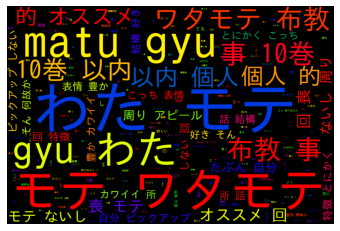

In [15]:
dfile = '/home/mo/twitter_automation/tweet_data/watamote.json'
savepath = '/home/mo/twitter_automation/tweet_data/watamote.png'

wordcloud = analyze_tweet(dfile,savepath)

In [20]:
try:
    api.update_with_media(status = '今日のツイート分析　検索ワード＝アイアンマン', filename = savepath)
    print("トゥイ―トしました(*‘ω‘ *)")
except:
    print("失敗(/ω＼)")

トゥイ―トしました(*‘ω‘ *)
